# Prerequisite
* Load required packages and load images (already uploaded on  Blackboard) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY following numpy and tensorflow/pytorch functions for any operations**



In [8]:
import tensorflow as tf
import numpy as np
from scipy import ndimage as nd
from scipy import interpolate as inter
from matplotlib import pyplot as plt
import imageio.v2 as imageio

(688, 688)
Original Data_type is uint8
Data_type is float32
Image Size is (1376, 1376)
Image min and max are (0.0, 253.0)


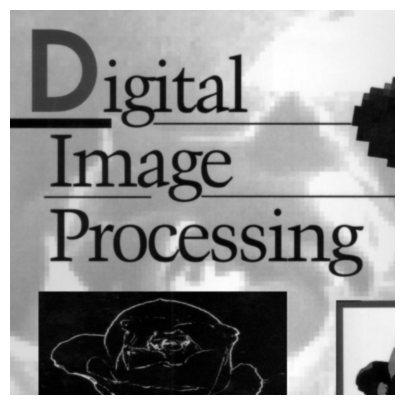

In [23]:
img_a0 = imageio.imread('book_image_orig.tif')
img_a = img_a0.astype(np.float32)
print(np.shape(img_a))
### Image Padding ##################################
### To avoid Artifacts (You can try removing it) ###
pad_sz = [344,344]
x_slice = slice(pad_sz[0],-pad_sz[0])
y_slice = slice(pad_sz[1],-pad_sz[1])
img_a = np.pad(img_a,(pad_sz[0],pad_sz[0]))
#####################################################

print('Original Data_type is {}'.format(img_a0.dtype))
print('Data_type is', img_a.dtype)
print('Image Size is {}'.format(img_a.shape))
print('Image min and max are ({}, {})'.format(img_a.min(),img_a.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_a[x_slice,y_slice], cmap='gray')
plt.axis('off')
plt.show()

FFT Data_type is complex128
FFT Size is (1376, 1376)
FFT min and max are ((-42535116.25958506-11427994.767764794j), (65241244+0j))
mod-FFT Data_type is float64
mod-FFT Size is (1376, 1376)
mod-FFT min and max are (0.6340369484376687, 65241244.0)
log mod-FFT min and max are (0.7084406057143952, 25.959280977502715)
lm-FFT Data_type is float64
mod-FFT Size is (1376, 1376)
mod-FFT min and max are (0.0, 255.0)


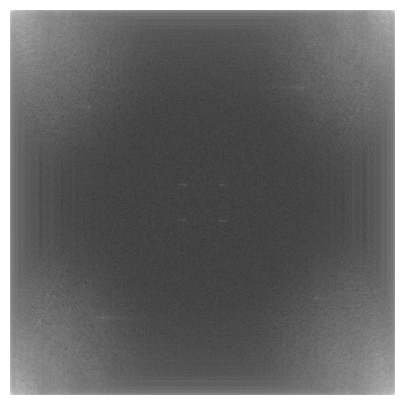

In [10]:
img_b = np.fft.fft2(img_a)
#################################################
print('FFT Data_type is {}'.format(img_b.dtype))
print('FFT Size is {}'.format(img_b.shape))
print('FFT min and max are ({}, {})'.format(img_b.min(),img_b.max()))
#################################################
img_b_mod = np.abs(img_b)
#################################################
print('mod-FFT Data_type is {}'.format(img_b_mod.dtype))
print('mod-FFT Size is {}'.format(img_b_mod.shape))
print('mod-FFT min and max are ({}, {})'.format(img_b_mod.min(),img_b_mod.max()))
print('log mod-FFT min and max are ({}, {})'.format(np.log2(1+img_b_mod.min()),np.log2(1+img_b_mod.max()) ))
#################################################
min_lb = np.log2(1+img_b_mod.min())
max_lb = np.log2(1+img_b_mod.max())

img_b_lm = np.log2(1+img_b_mod)
img_c = (img_b_lm-min_lb) / (max_lb - min_lb)
img_c = 255.0*img_c
#################################################
print('lm-FFT Data_type is {}'.format(img_c.dtype))
print('mod-FFT Size is {}'.format(img_c.shape))
print('mod-FFT min and max are ({}, {})'.format(img_c.min(),img_c.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_c, cmap='gray')
plt.axis('off')
plt.show()

shift-FFT Data_type is complex128
shift-FFT Size is (1376, 1376)
shift-FFT min and max are ((-42535116.25958506-11427994.767764794j), (65241244+0j))
shift-lm-FFT Data_type is float64
shift-mod-FFT Size is (1376, 1376)
shift-mod-FFT min and max are (0.0, 255.0)


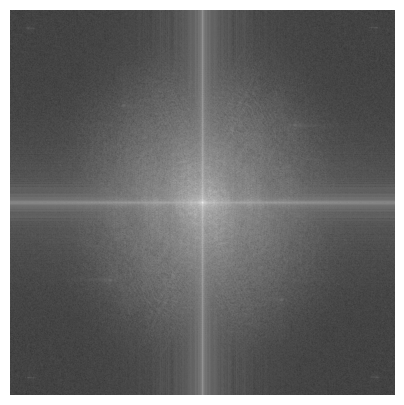

In [11]:
img_fft_a = np.fft.fft2(img_a)
img_d = np.fft.fftshift(img_fft_a)
#################################################
print('shift-FFT Data_type is {}'.format(img_d.dtype))
print('shift-FFT Size is {}'.format(img_d.shape))
print('shift-FFT min and max are ({}, {})'.format(img_d.min(),img_d.max()))
#################################################
img_d_mod = np.abs(img_d)
min_ld = np.log2(1+img_d_mod.min())
max_ld = np.log2(1+img_d_mod.max())

img_d_lm = np.log2(1+img_d_mod)
img_e = (img_d_lm-min_ld) / (max_ld - min_ld)
img_e = 255.0*img_e
#################################################
print('shift-lm-FFT Data_type is {}'.format(img_e.dtype))
print('shift-mod-FFT Size is {}'.format(img_e.shape))
print('shift-mod-FFT min and max are ({}, {})'.format(img_e.min(),img_e.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_e, cmap='gray')
plt.axis('off')
plt.show()

In [12]:
[M, N] = img_b.shape
[vv,uu] = np.meshgrid(range(N), range(M))
uu = (uu) - 0.5*M
vv = (vv) - 0.5*N
print(vv/N)
print(uu/M)

[[-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 ...
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]
 [-0.5        -0.49927326 -0.49854651 ...  0.49781977  0.49854651
   0.49927326]]
[[-0.5        -0.5        -0.5        ... -0.5        -0.5
  -0.5       ]
 [-0.49927326 -0.49927326 -0.49927326 ... -0.49927326 -0.49927326
  -0.49927326]
 [-0.49854651 -0.49854651 -0.49854651 ... -0.49854651 -0.49854651
  -0.49854651]
 ...
 [ 0.49781977  0.49781977  0.49781977 ...  0.49781977  0.49781977
   0.49781977]
 [ 0.49854651  0.49854651  0.49854651 ...  0.49854651  0.49854651
   0.49854651]
 [ 0.49927326  0.49927326  0.49927326 ...  0.49927326  0.49927326
   0.49927326]]


In [13]:
PI = np.pi
A=0.02
B=0.02
T = 1
# A=0.0003
# B=0.0003
# T = 1

#print(PI)
sinc01 = np.sinc(PI*((uu)*A+(vv)*B))
ej = np.exp(-(1j)*PI*((uu)*A+(vv)*B))

H = T*(sinc01)*ej

img_fft_filt_shifted = img_d*H   # Motion Blur Filter is applied to shifted DFT
img_fft_filt = np.fft.ifftshift(img_fft_filt_shifted) # IFFTshift

(-0.10237411805318994-0.07437915053268374j) (1+0j)


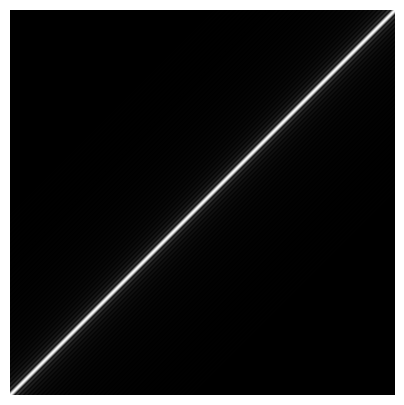

In [14]:
H_spec = np.abs(H)
print(H.min(),H.max())
plt.figure(figsize=(5,5))
plt.imshow(H_spec, cmap='gray')
plt.axis('off')
plt.show()

(-0.20818284676154192+0.00024527800276117457j) (250.60294227744325-0.0005559784937370125j)


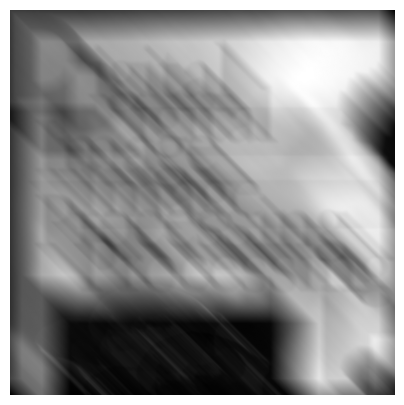

In [15]:
img_low = np.fft.ifft2(img_fft_filt)
print(img_low.min(),img_low.max())
img_low_mod = np.abs(img_low)
plt.figure(figsize=(5,5))
plt.imshow(img_low_mod[x_slice,y_slice], cmap='gray')
plt.axis('off')
plt.show()

#Q1) Wiener Filter

##a) Show the Shifted Fourier Transform of previous motion blured image **[2 Marks]**

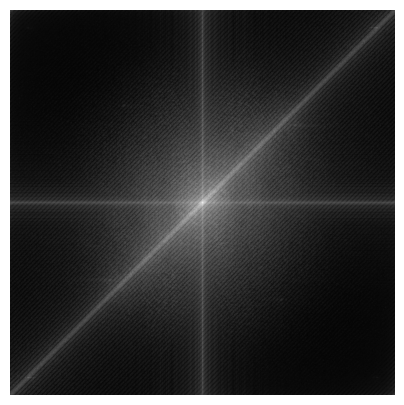

In [24]:
img_mblur = img_low_mod
fft_img_a=np.fft.fft2(img_mblur)
shifted_fft_img_a=np.fft.fftshift(fft_img_a)
shifted_fft_img_a_mag = np.log(np.abs(shifted_fft_img_a)+1)

plt.figure(figsize=(5,5))
plt.imshow(shifted_fft_img_a_mag, cmap='gray')
plt.axis('off')
plt.show()

##b) Calculate and Show Wiener Filter using $H(u,v)$ Provided. Tune $K$ accordingly and report.
##**[4 Marks]**

In [26]:
H_conj= np.conj(H)

def wiener_transform(K):
    H_wiener=H_conj/(np.abs(H)**2 + K)
    img_wiener_shift= img_fft_filt_shifted*H_wiener
    img_wiener= np.fft.ifftshift(img_wiener_shift)
    img_low= np.fft.ifft2(img_wiener)
    img_low_mod= np.abs(img_low)
    return H_wiener, img_low_mod

def render(K):
    wiener_filter_mag=np.abs(wiener_transform(K)[0])
    plt.figure(figsize=(5,5))
    plt.imshow(wiener_filter_mag, cmap='gray')
    plt.axis('off')
    plt.title(f'K = {K}')
    plt.show()
    


##c) Kindly apply Wiener filter on shifted Fourier trasform of motion blurred image. Reconstruct the image back and Show the image. **[4 Marks]**

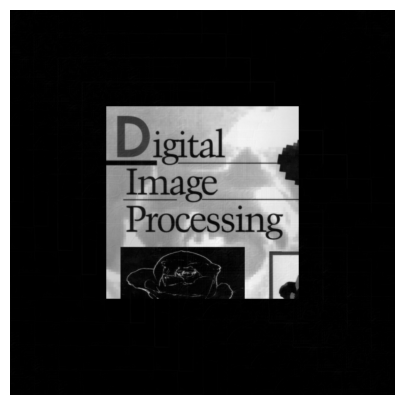

Noise estimate at 5e-06: is 53.79330895398768


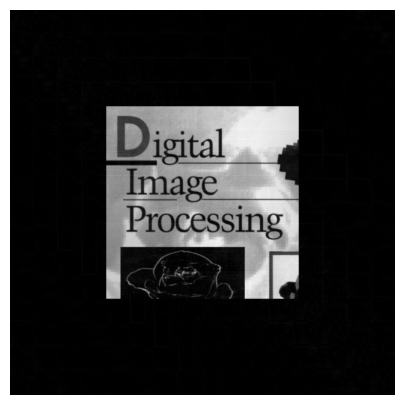

Noise estimate at 1e-05: is 53.58151105090606


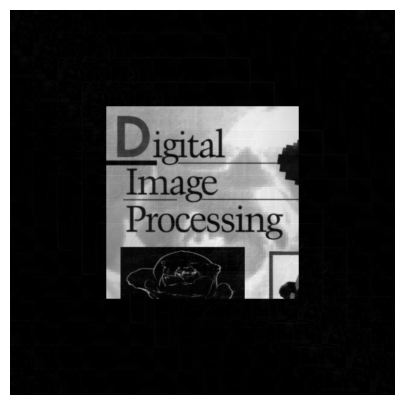

Noise estimate at 1.5000000000000002e-05: is 53.41230299776143


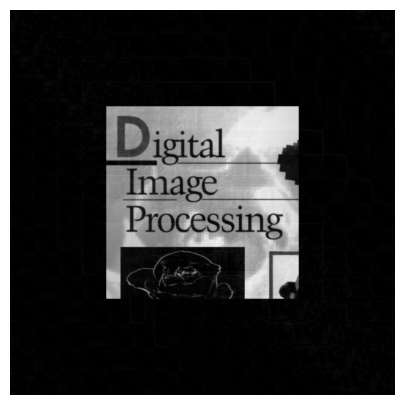

Noise estimate at 2e-05: is 53.274923155638234


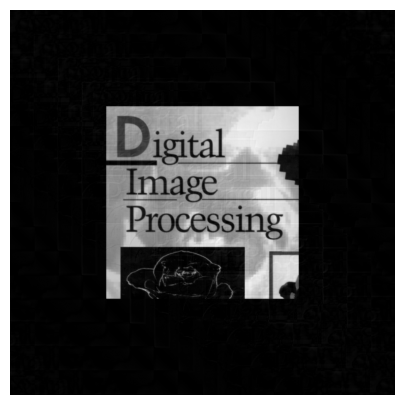

Noise estimate at 2.5e-05: is 53.16157222182082


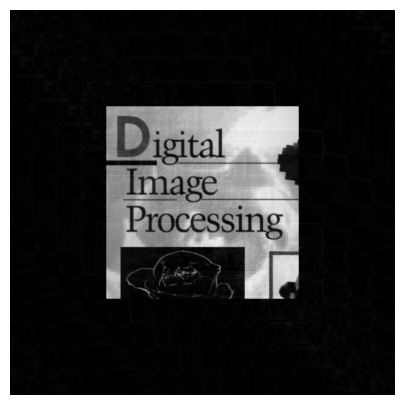

Noise estimate at 3e-05: is 53.06697939398017


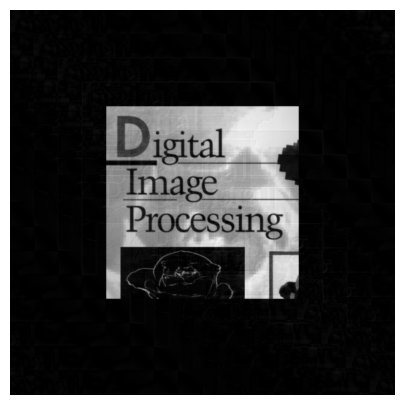

Noise estimate at 3.5000000000000004e-05: is 52.986838563651894


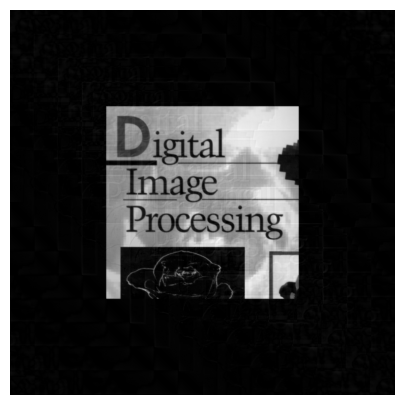

Noise estimate at 4e-05: is 52.917928854301785


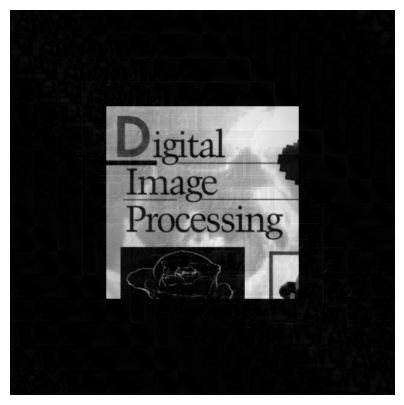

Noise estimate at 4.5e-05: is 52.857982611639216


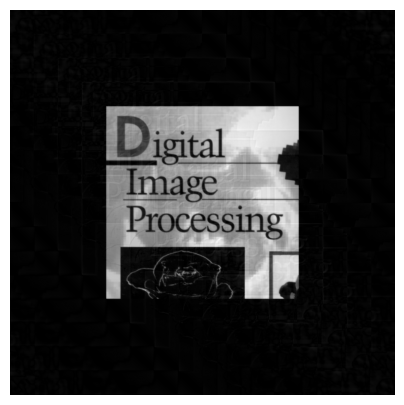

Noise estimate at 5e-05: is 52.80527717063028


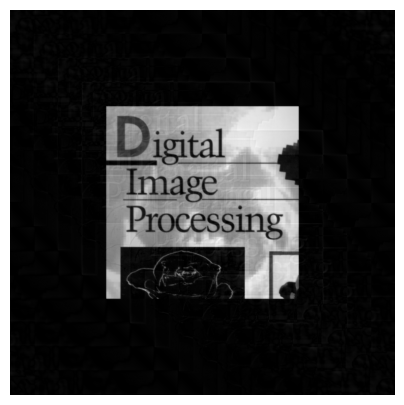

Noise estimate at 5.5e-05: is 52.75849091115182


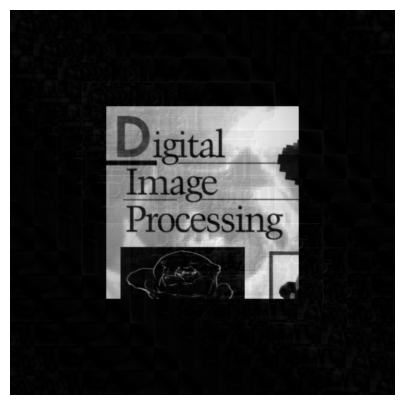

Noise estimate at 6e-05: is 52.71660106688934


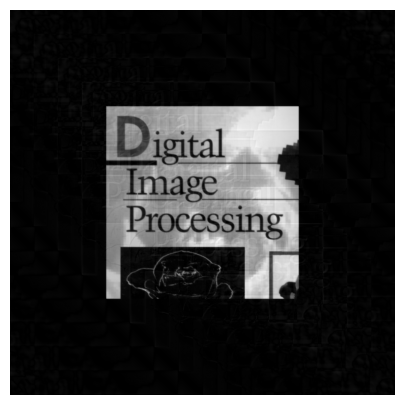

Noise estimate at 6.500000000000001e-05: is 52.678801162625255


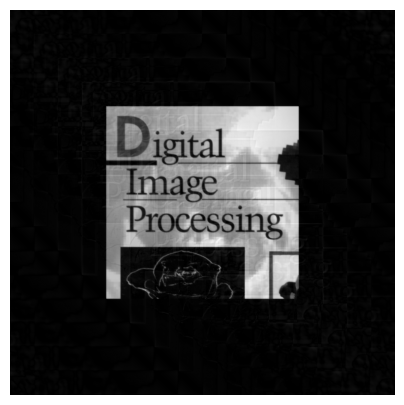

Noise estimate at 7.000000000000001e-05: is 52.64445552706827


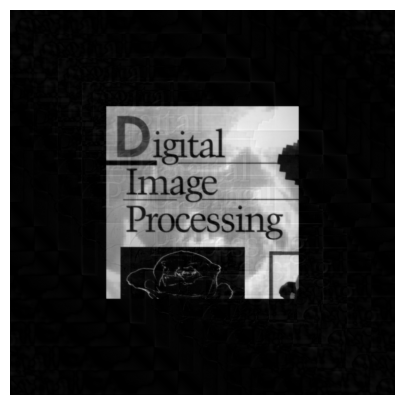

Noise estimate at 7.500000000000001e-05: is 52.61310098488397


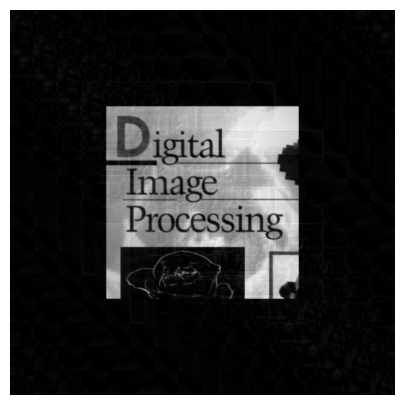

Noise estimate at 8e-05: is 52.584335560023625


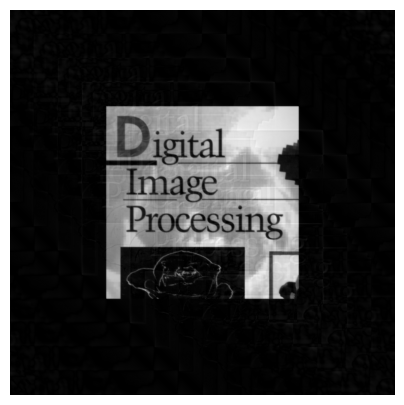

Noise estimate at 8.5e-05: is 52.55781534472033


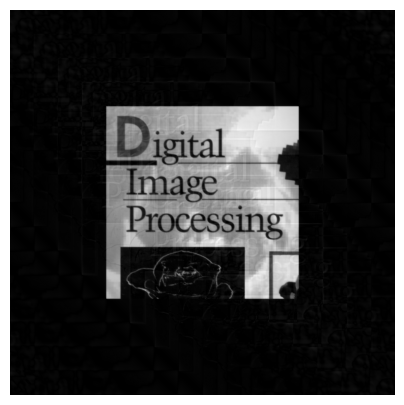

Noise estimate at 9e-05: is 52.53326190801877


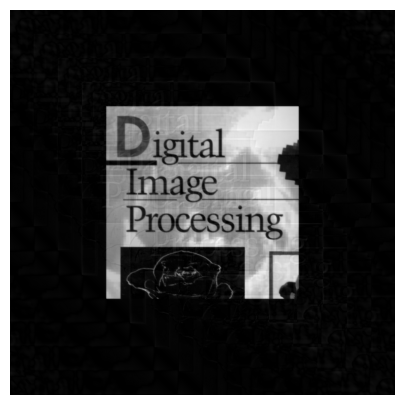

Noise estimate at 9.5e-05: is 52.51044650391945


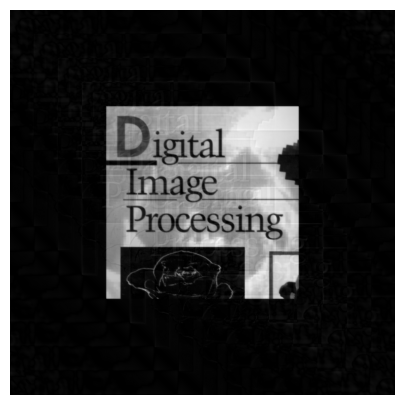

Noise estimate at 0.0001: is 52.489174162540095


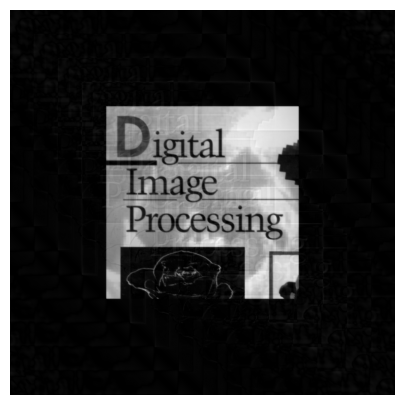

Noise estimate at 0.000105: is 52.46927364285709


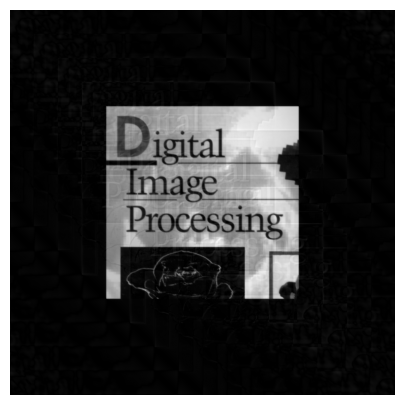

Noise estimate at 0.00011: is 52.450592163397694


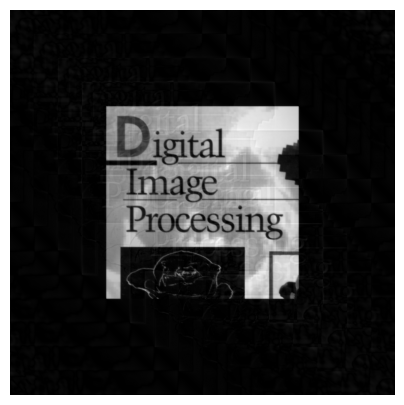

Noise estimate at 0.000115: is 52.43300583670936


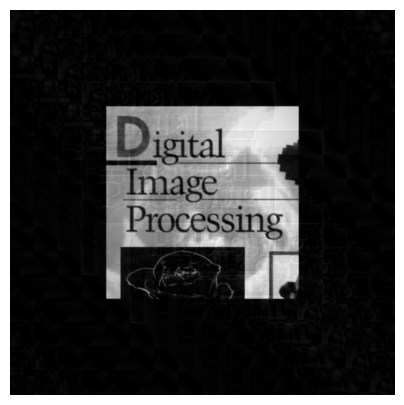

Noise estimate at 0.00012: is 52.416398253753556


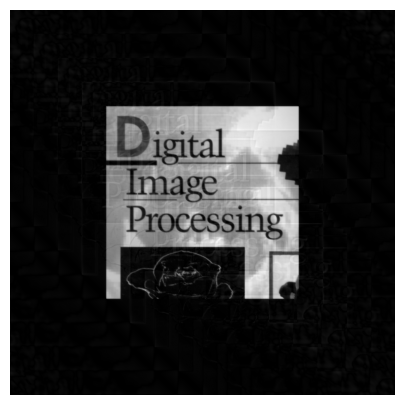

Noise estimate at 0.000125: is 52.40067978733161


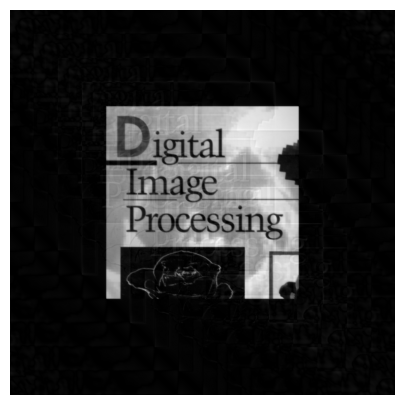

Noise estimate at 0.00013000000000000002: is 52.38576849019542


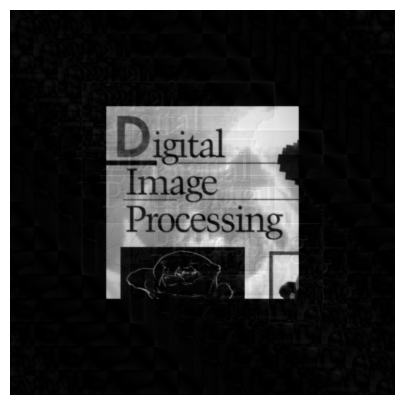

Noise estimate at 0.00013500000000000003: is 52.371598206918335


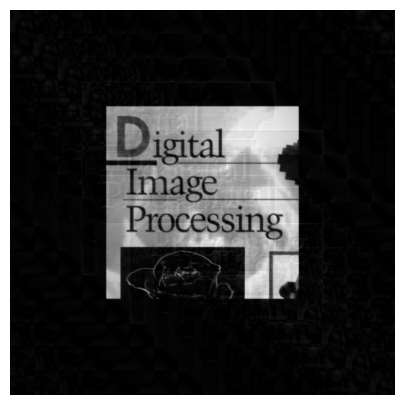

Noise estimate at 0.00014000000000000004: is 52.35810696097575


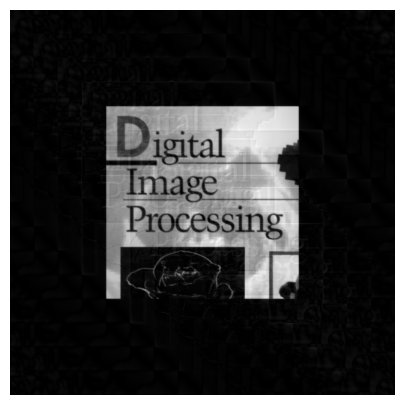

Noise estimate at 0.00014500000000000006: is 52.345239430698996


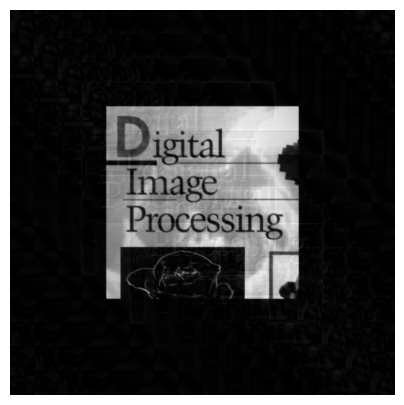

Noise estimate at 0.00015000000000000007: is 52.33293630353678


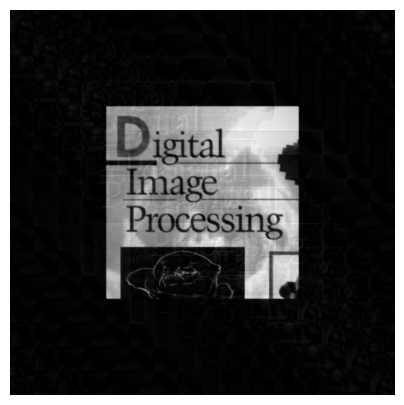

Noise estimate at 0.00015500000000000008: is 52.32115540492621


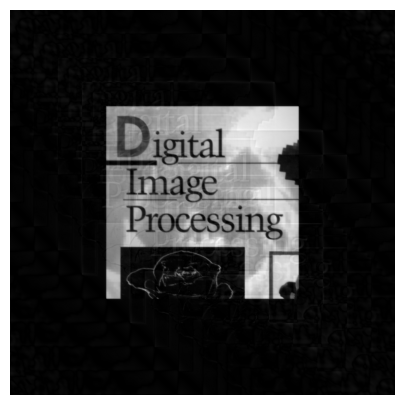

Noise estimate at 0.0001600000000000001: is 52.30986397815441


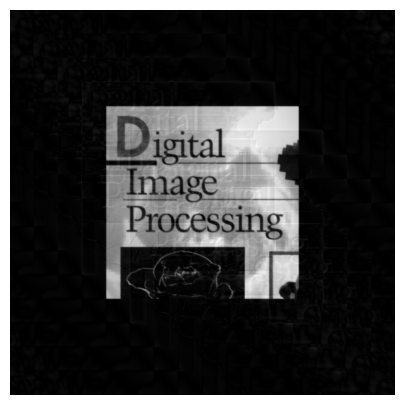

Noise estimate at 0.0001650000000000001: is 52.29901371978731


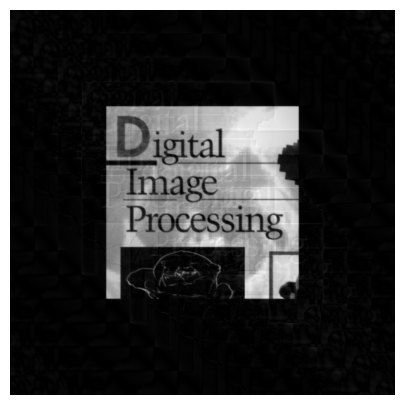

Noise estimate at 0.00017000000000000012: is 52.288575687556474


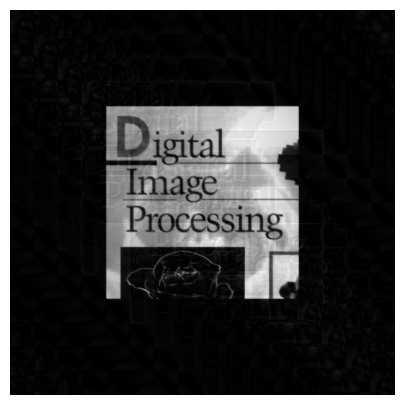

Noise estimate at 0.00017500000000000013: is 52.278521776294156


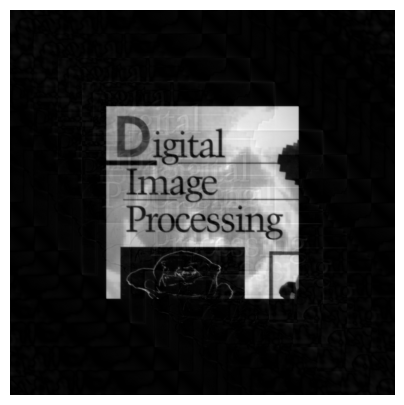

Noise estimate at 0.00018000000000000015: is 52.26883237569805


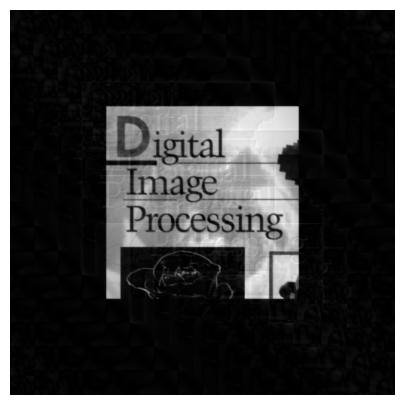

Noise estimate at 0.00018500000000000016: is 52.25948289029987


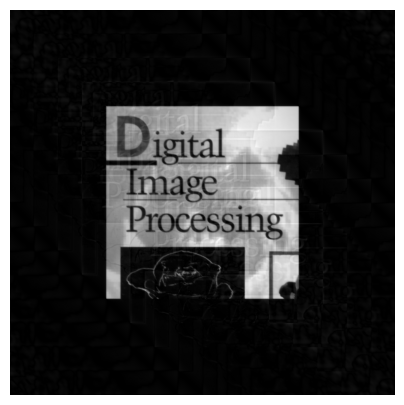

Noise estimate at 0.00019000000000000017: is 52.25045319758133


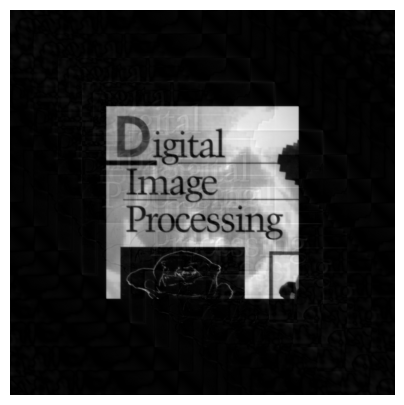

Noise estimate at 0.00019500000000000019: is 52.24171717063699


In [29]:

K=0.000005

while K<=0.0002:
    wiener_image=wiener_transform(K)[1]
    noise_estimate=np.mean(np.abs(wiener_image-np.mean(wiener_image)))
    plt.figure(figsize=(5,5))
    plt.imshow(wiener_image, cmap='gray')
    plt.axis('off')
    plt.show()
    print(f"Noise estimate at {K}: is {noise_estimate}")
    K=K+0.000005



As K increases, sharpness and noise decreases

#Q2)  Kindly apply Wiener filter on shifted Fourier trasform of motion blurred image 'book_image_medium_noise.tif'. Reconstruct the image back and Show the image. **[10 Marks]**

In [31]:
img2_0=imageio.imread("D:\\collegeCode\\sem4\\csd212\\lab8\\book_image_medium_noise.tif")
img2=img_a0.astype(np.float32)
img2=np.pad(img2,(pad_sz[0],pad_sz[0]))
print(np.shape(img2))

(1376, 1376)


In [33]:
img2_fft = np.fft.fft2(img2)
img2_fft_shifted = np.fft.fftshift(img2_fft)


def wiener_transform_2(K):
    H_wiener= H_conj/(np.abs(H)**2 + K)
    img_wiener_shift = img2_fft_shifted*H_wiener
    img_wiener = np.fft.ifftshift(img_wiener_shift)
    img_low = np.fft.ifft2(img_wiener)
    img_low_mod = np.abs(img_low)
    return H_wiener, img_low_mod

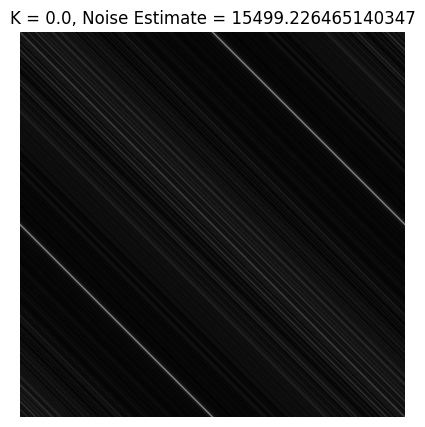

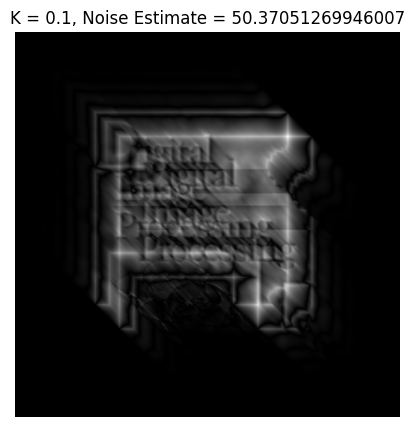

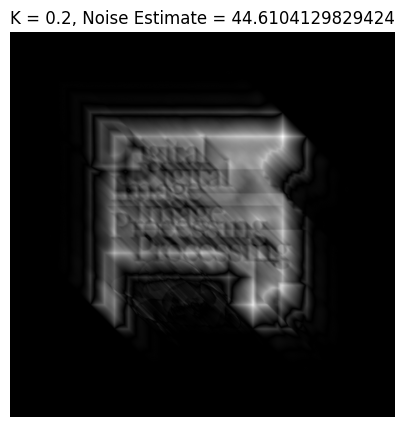

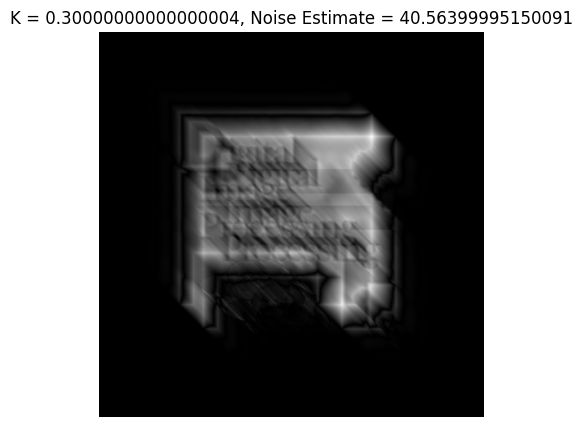

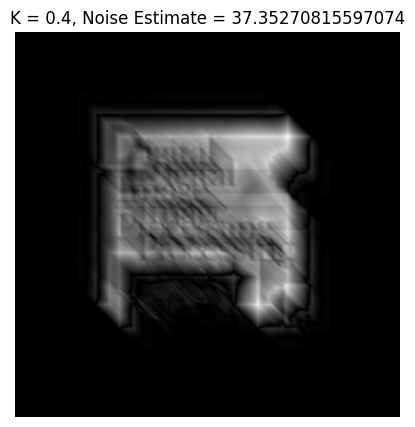

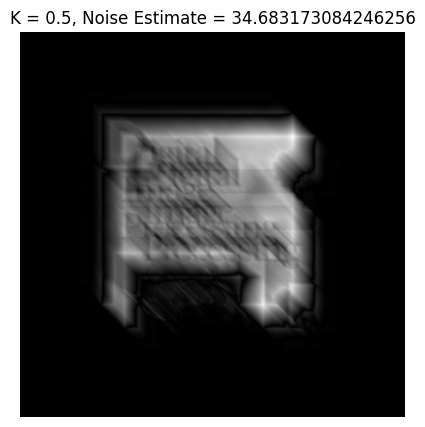

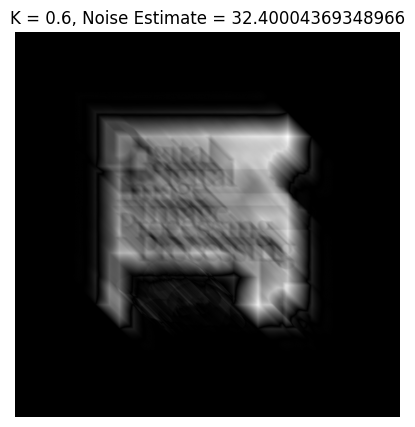

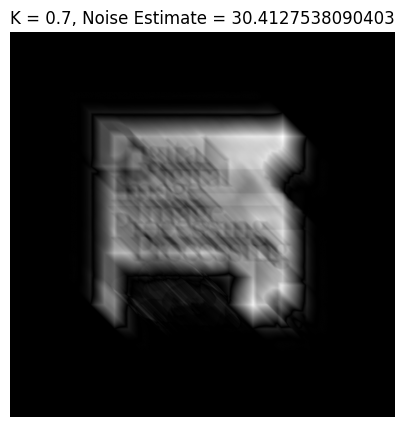

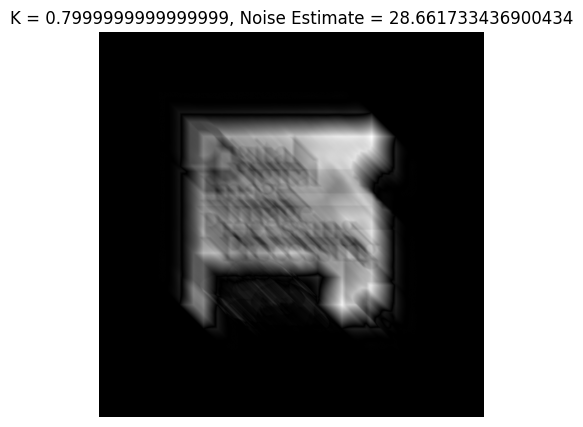

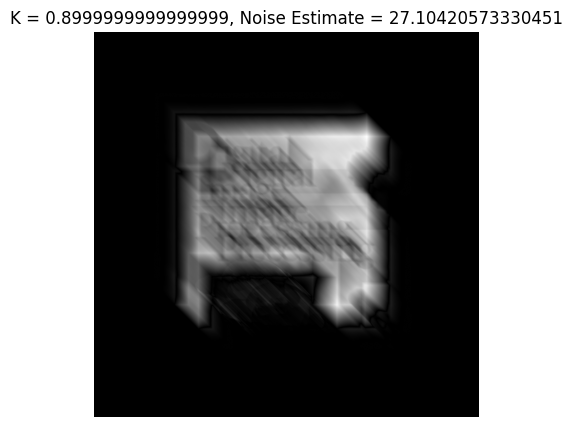

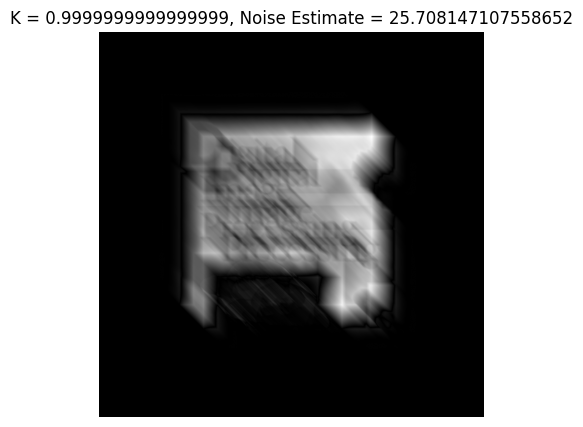

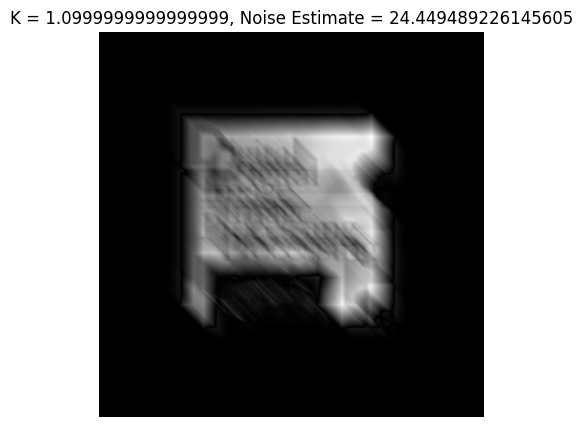

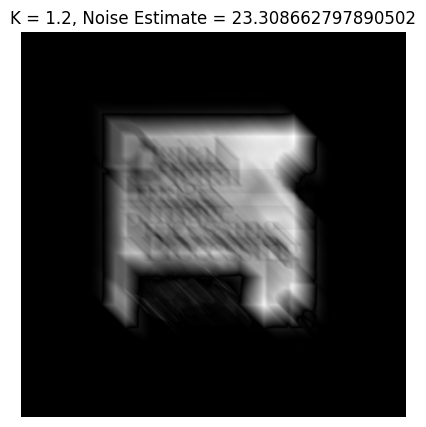

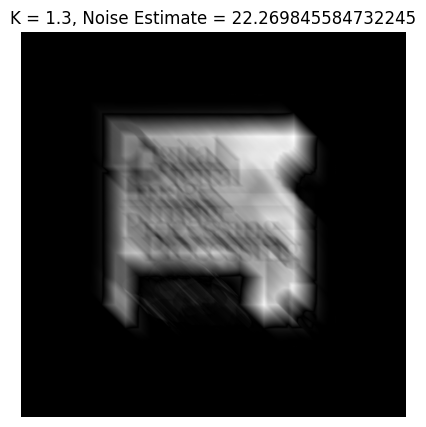

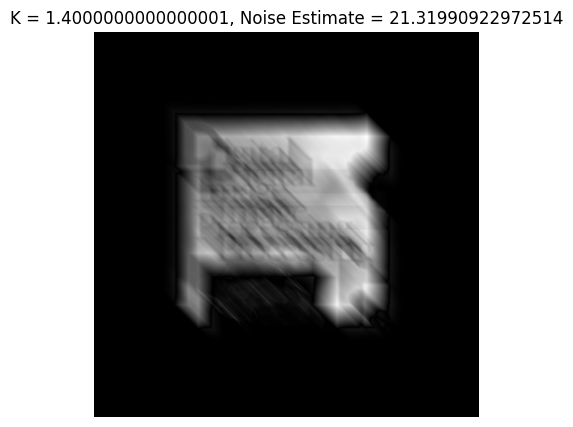

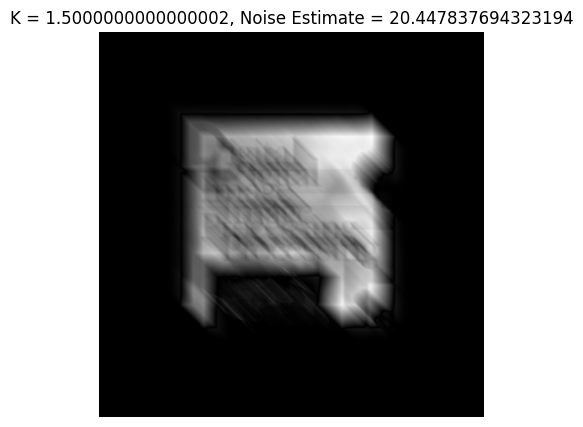

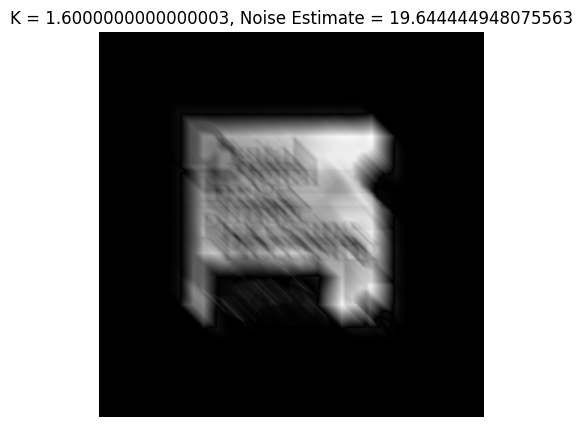

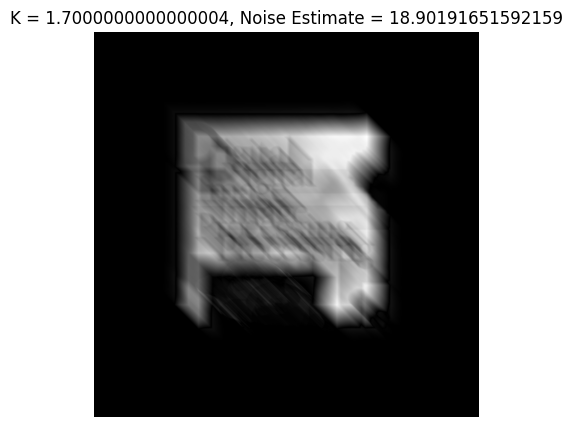

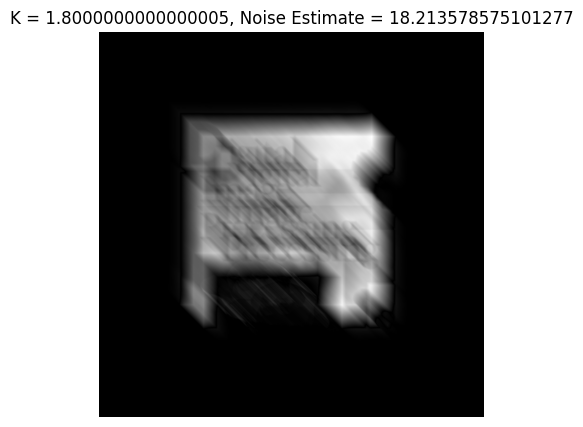

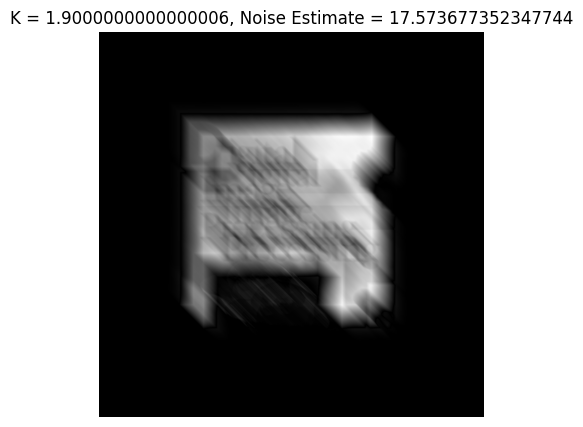

In [35]:
K=0.0

while K<=2:
    wiener_image = wiener_transform_2(K)[1]
    noise_estimate = np.mean(np.abs(wiener_image - np.mean(wiener_image)))
    plt.figure(figsize=(5,5))
    plt.imshow(wiener_image, cmap='gray')
    plt.axis('off')
    plt.title(f'K = {K}, Noise Estimate = {noise_estimate}')
    plt.show()
    K=K+0.1  

Increasing values of noise reduce noise and sharpness is not visibly impacted, but visible bluriness
